## Importing The required Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [130]:
# Set the style
sns.set_style("whitegrid")

In [131]:
# Reading the dataset
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [133]:
# Define a dictionary for renaming columns
rename_dict = {
    "ID": "Customer_ID",
    "Year_Birth": "Birth_Year",
    "Education": "Education_Level",
    "Marital_Status": "Marital_Status",
    "Income": "Annual_Income",
    "Kidhome": "Kids_at_Home",
    "Teenhome": "Teens_at_Home",
    "Dt_Customer": "Customer_Since",
    "Recency": "Last_Purchase_Days",
    "MntWines": "Spending_Wines",
    "MntFruits": "Spending_Fruits",
    "MntMeatProducts": "Spending_Meat",
    "MntFishProducts": "Spending_Fish",
    "MntSweetProducts": "Spending_Sweets",
    "MntGoldProds": "Spending_Gold",
    "NumDealsPurchases": "Deals_Purchases",
    "NumWebPurchases": "Web_Purchases",
    "NumCatalogPurchases": "Catalog_Purchases",
    "NumStorePurchases": "Store_Purchases",
    "NumWebVisitsMonth": "Web_Visits_Month",
    "AcceptedCmp3": "Accepted_Campaign_3",
    "AcceptedCmp4": "Accepted_Campaign_4",
    "AcceptedCmp5": "Accepted_Campaign_5",
    "AcceptedCmp1": "Accepted_Campaign_1",
    "AcceptedCmp2": "Accepted_Campaign_2",
    "Complain": "Customer_Complaint",
    "Z_CostContact": "Contact_Cost",
    "Z_Revenue": "Revenue_Generated",
    "Response": "Last_Campaign_Response"
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# Verify the changes
df.head()


,Customer_ID,Birth_Year,Education_Level,Marital_Status,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,...,Web_Visits_Month,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [134]:
df.describe().style.background_gradient()

,Customer_ID,Birth_Year,Annual_Income,Kids_at_Home,Teens_at_Home,Last_Purchase_Days,Spending_Wines,Spending_Fruits,Spending_Meat,Spending_Fish,Spending_Sweets,Spending_Gold,Deals_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Month,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


## Preprocessing the data

<Axes: >

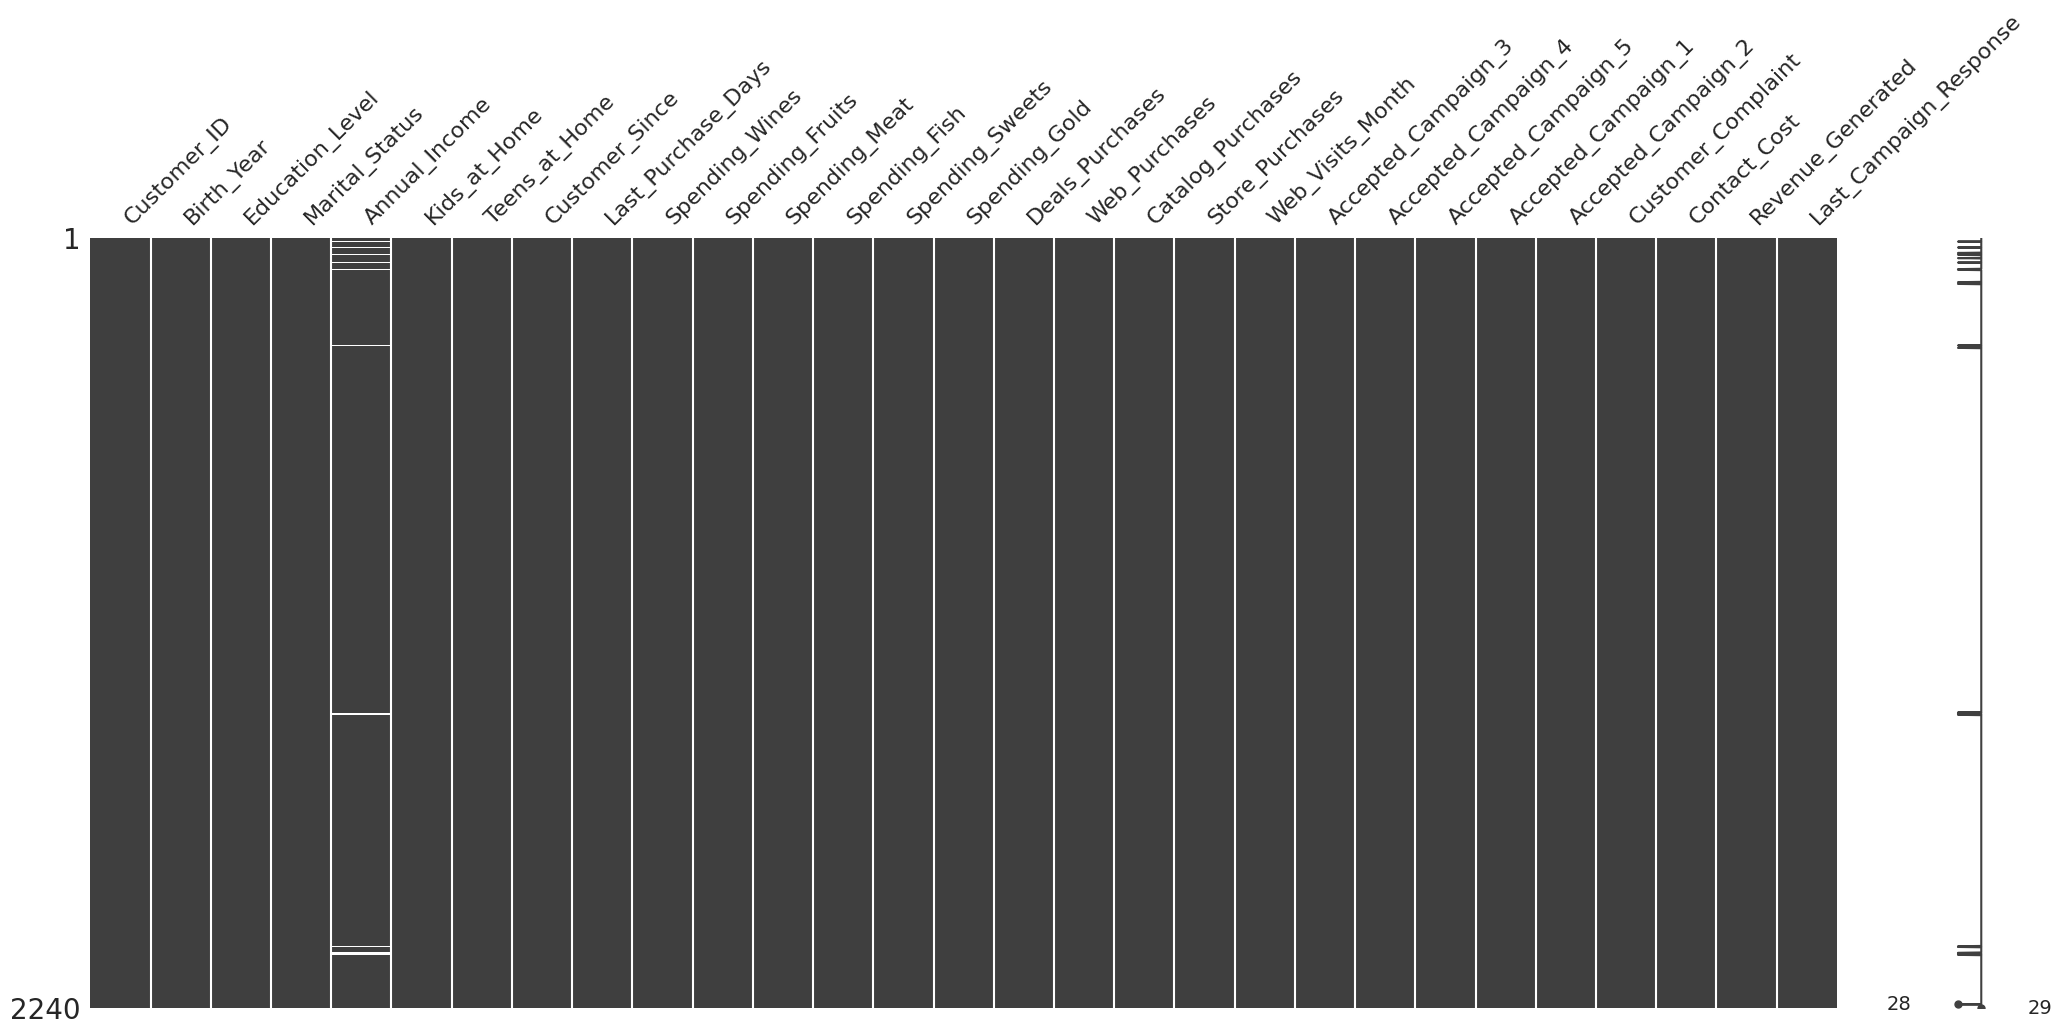

In [135]:
#Checking Null Values and Their Distribution
msno.matrix(df)

<Axes: xlabel='Annual_Income', ylabel='Count'>

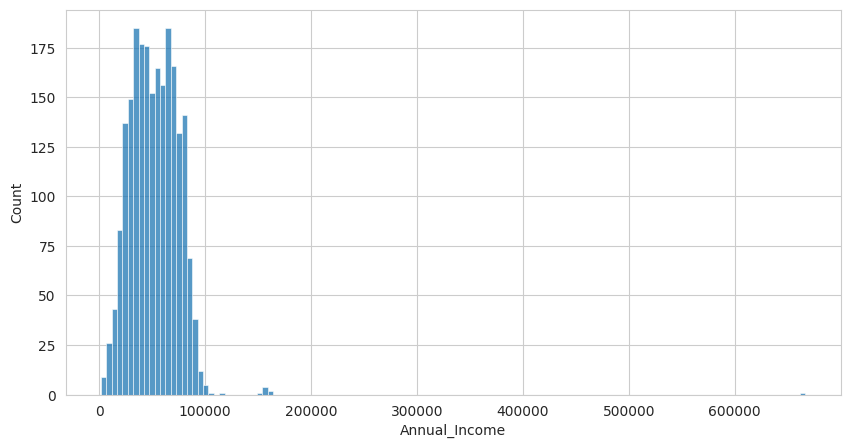

In [136]:
plt.figure(figsize=(10,5))
sns.histplot(df['Annual_Income']) # Changed 'Income' to 'Annual_Income'

In [137]:
#Imputation of null values
imputer = KNNImputer(n_neighbors=5)
df['Annual_Income'] = imputer.fit_transform(df[['Annual_Income']])

<Axes: xlabel='Annual_Income', ylabel='Count'>

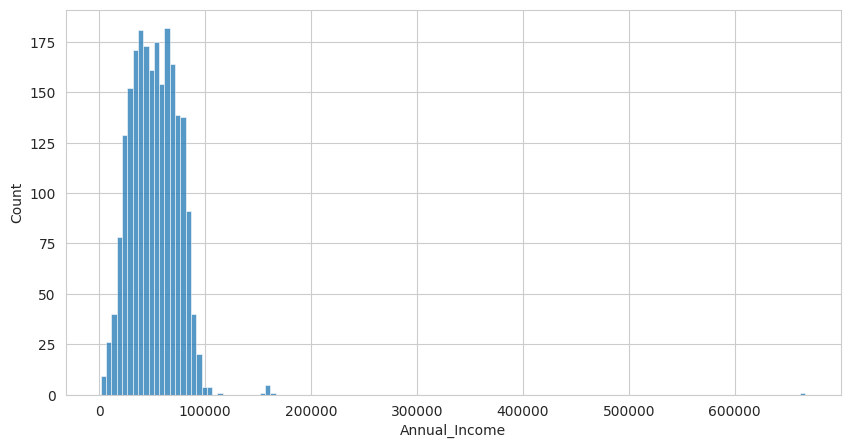

In [138]:
plt.figure(figsize=(10,5))
sns.histplot(df['Annual_Income'])

<Axes: >

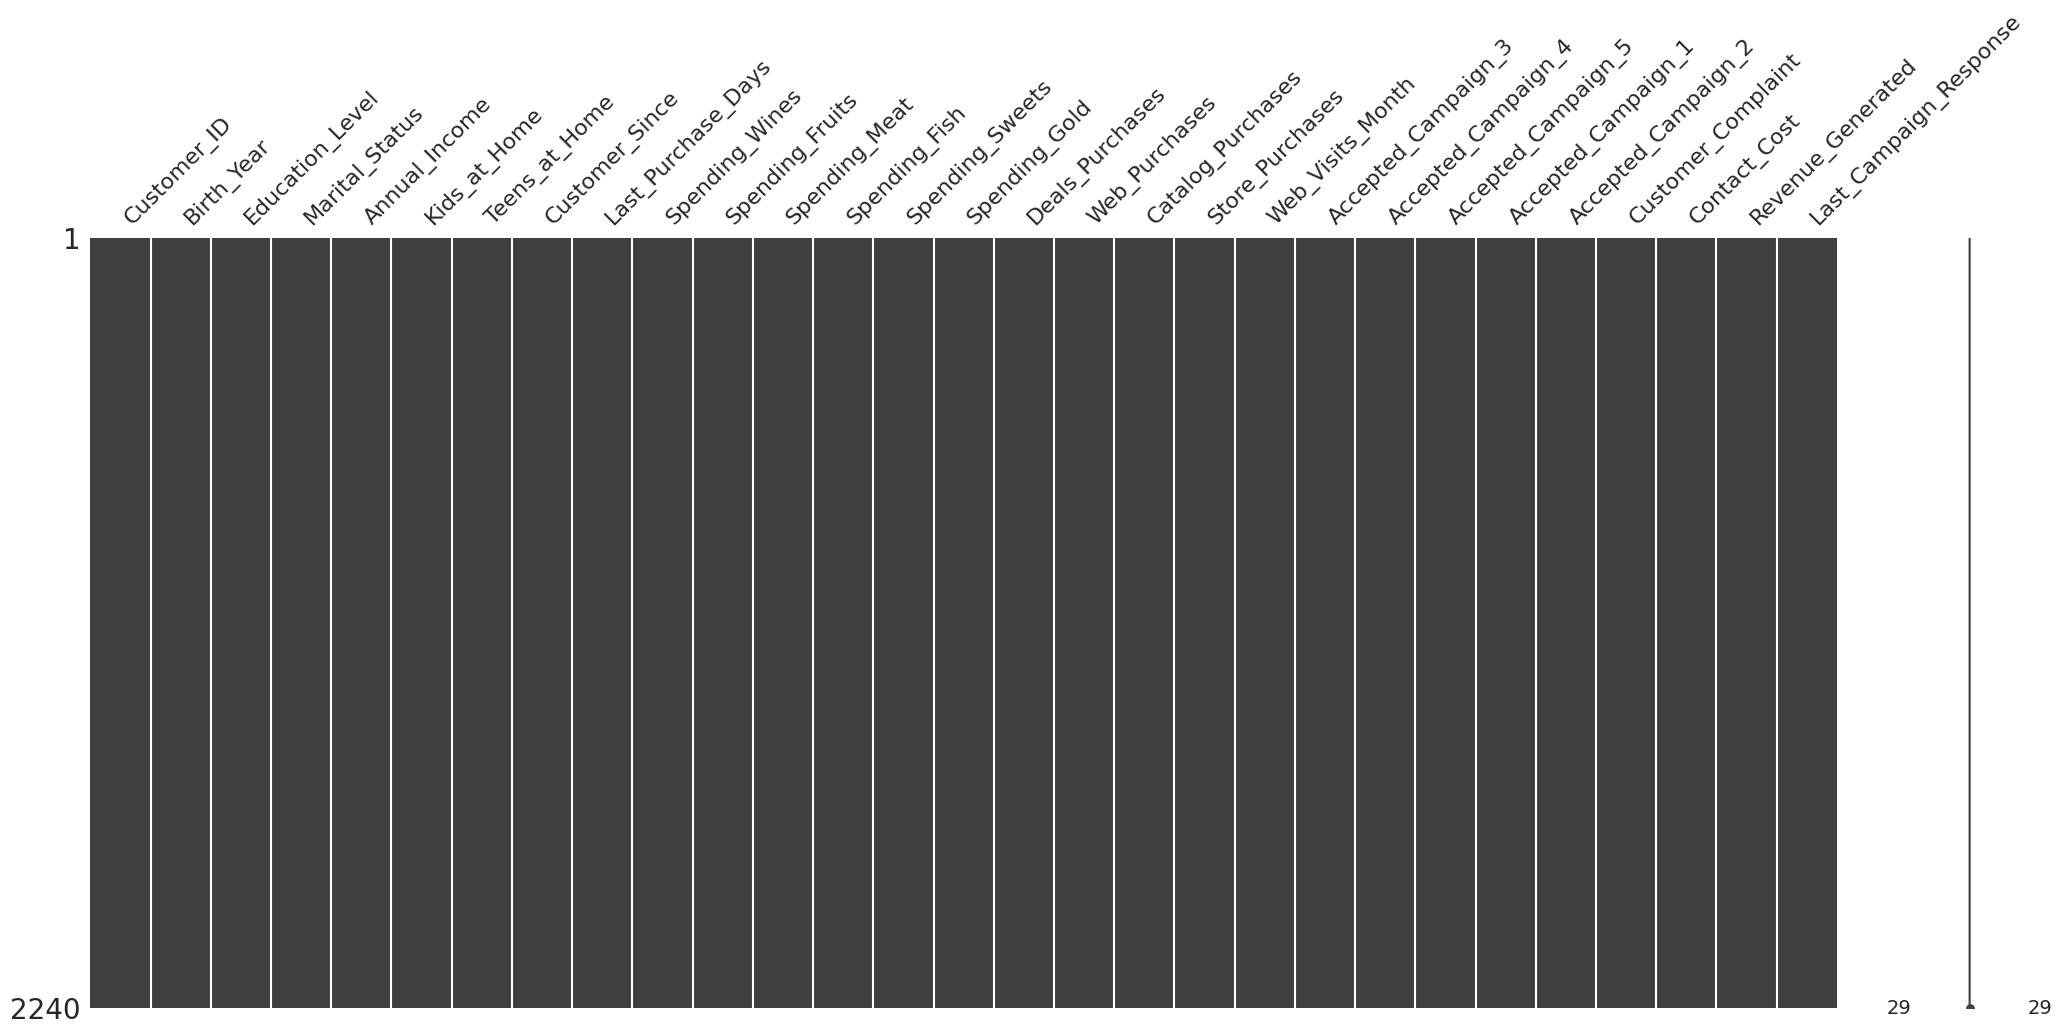

In [139]:
# After the imputation of values in Income column
msno.matrix(df)

In [140]:
# Dataframe for EDA
cl_df = df.copy()

## Exploratory Data Analysis

# 1️⃣ Customer Demographics

These questions help in understanding the age, income, and marital status of your customers.

✅ What is the average age of customers?


In [141]:
# Getting todays Date
today = datetime.date.today()

# Getting the age of customer as creating a new column
cl_df['Age'] = today.year - cl_df['Birth_Year']

In [142]:
avg_age = cl_df['Age'].mean() # Average age of customr
print(f'Average age of customers is {avg_age}')

Average age of customers is 56.19419642857143


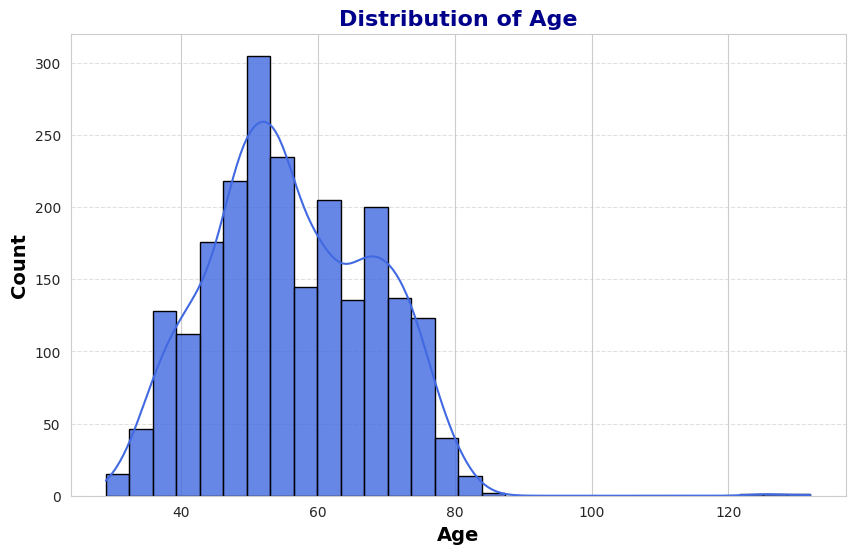

In [143]:
# Create the figure
plt.figure(figsize=(10,6))

# histogram with color, edges, and transparency
sns.histplot(cl_df['Age'], bins=30, kde=True, color='royalblue', edgecolor='black', alpha=0.8)

# Add titles and labels
plt.title('Distribution of Age', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Age', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')

# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()

✅ What is the distribution of customers across different education levels?


In [144]:
Dist_data = df['Education_Level'].value_counts() # Changed 'Education' to 'Education_Level'
Dist_data = pd.DataFrame(Dist_data)
Dist_data['perc_distribution'] = Dist_data['count'] / len(df)
Dist_data

,count,perc_distribution
Education_Level,,
Graduation,1127,0.503125
PhD,486,0.216964
Master,370,0.165179
2n Cycle,203,0.090625
Basic,54,0.024107


In [145]:
# Define a color map using a qualitative color palette
color_map = px.colors.qualitative.Pastel

# Create an enhanced pie chart using Plotly
fig = px.pie(
    Dist_data.reset_index(),  # Reset index to use DataFrame correctly
    values='count',  # Column representing values for the pie chart
    names='Education_Level',  # Column representing category names
    color_discrete_sequence=color_map,  # Apply custom pastel colors
    hole=0.3  # Creates a donut effect by adding a hole in the center
)

# Customize slices: Display percentage and labels, slightly separate the first slice
fig.update_traces(
    textinfo='percent+label',  # Show percentage and category labels
    pull=[0.1, 0, 0, 0, 0]  # Offset the first slice slightly
)

# Update layout settings for better visualization
fig.update_layout(
    title={  # Configure title properties
        'text': 'Distribution of Education Levels',  # Title text
        'x': 0.5,  # Center-align the title
        'font': {'size': 18, 'color': 'darkblue'}  # Set font size and color
    },
    legend_title="Education Levels",  # Title for the legend
    template="seaborn",  # Use Seaborn theme for styling
    width=900,  # Set figure width
    height=600  # Set figure height
)

# Display the pie chart
fig.show()


  ✅ Which marital status group has the highest spending?


In [146]:
# Getiing the sum for each column in dataset
amt_spent = cl_df.groupby('Marital_Status')[['Spending_Wines', 'Spending_Fruits', 'Spending_Meat', 'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']].sum()
# Calculate the total amount spent by summing across columns for each row
amt_spent['Total Amt'] = amt_spent.sum(axis=1)
amt_spent = amt_spent.sort_values(by = "Total Amt", ascending=False) #Sorting in Descending Order
amt_spent

,Spending_Wines,Spending_Fruits,Spending_Meat,Spending_Fish,Spending_Sweets,Spending_Gold,Total Amt
Marital_Status,,,,,,,
Married,258751,22235,138829,30569,23070,36999,510453
Together,177959,14703,97500,22615,15151,24937,352865
Single,138399,12881,87412,18344,13086,20990,291112
Divorced,75364,6363,34848,8130,6222,10739,141666
Widow,28434,2548,14575,3957,3004,4371,56889
Absurd,711,169,625,411,61,408,2385
YOLO,644,6,100,8,6,84,848
Alone,554,12,79,23,21,81,770


In [147]:
# Custom color palette
color_map = px.colors.qualitative.Prism

# Create enhanced bar chart
fig = px.bar(
    amt_spent.reset_index(),
    y='Total Amt',
    x='Marital_Status',
    color='Marital_Status',
    text_auto=True,
    color_discrete_sequence=color_map
)

# Update layout
fig.update_layout(
    title={
        'text': 'Total Amount Spent by Marital Status',
        'x': 0.5,  # Center title
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Marital Status",
    yaxis_title="Total Amount Spent",
    template="seaborn",
    plot_bgcolor="rgba(0,0,0,0)",  # Transparent background,
    width = 900 ,
    height=600
)

fig.show()

  ✅ How does income vary across different education levels?

In [148]:
# average Incoame  according to the Education Level
Avg_income = cl_df.groupby('Education_Level')[['Annual_Income']].mean().sort_values(by = "Annual_Income", ascending=False)
Avg_income

,Annual_Income
Education_Level,
PhD,56105.210405
Master,52908.476370
Graduation,52715.755781
2n Cycle,47701.378099
Basic,20306.259259


In [149]:
color_map = px.colors.qualitative.Pastel

fig = px.bar(Avg_income.reset_index(),
             x='Education_Level',
             y='Annual_Income',
             text_auto=True,
             color='Education_Level',
             color_discrete_sequence=color_map,
             )
fig.update_layout(
    title=(
        {
            'text': 'Average Income By Education Level',
            'x': 0.5,
            'font': {'size': 18, 'color': 'darkblue'}
        }
    ),
    xaxis_title='Education Level',
    yaxis_title='Average Income',
    template='seaborn',
    width=900,
    height=600
)
fig.show()

2️⃣ Spending Behavior & Preferences


This will help identify spending habits, popular products, and customer loyalty.

✅ Which product category do customers spend the most on (Wines, Meat, Gold, etc.)?


In [150]:
# Drop the 'Total Amt' column and sum the spending across all products
product_spending = amt_spent.drop(columns=['Total Amt']).sum().to_dict()

# Convert the dictionary into a DataFrame with two columns: 'Product' and 'Total Spending'
product_spending = pd.DataFrame(product_spending.items(), columns=['Product', 'Total Spending'])

# Sort the DataFrame by 'Total Spending' in descending order
product_spending = product_spending.sort_values(by='Total Spending', ascending=False)

# Display the sorted DataFrame
product_spending

,Product,Total Spending
0,Spending_Wines,680816
2,Spending_Meat,373968
5,Spending_Gold,98609
3,Spending_Fish,84057
4,Spending_Sweets,60621
1,Spending_Fruits,58917


In [151]:
# Custom color palette
color_map = px.colors.qualitative.Set2

# Create bar chart

fig = px.bar(product_spending,
             x='Product',
             y='Total Spending',
             color='Product',
             text_auto=True,
             color_discrete_sequence=color_map)

# Update layout
fig.update_layout(
    title={
        'text': "Total Spending By Each Product Category",
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Product Category",
    yaxis_title="Total Spending",
    template="seaborn",
    width = 900 ,
    height=600
)

fig.show()

✅ What is the average total spending per customer?


In [152]:
# Group the data by 'Customer_ID' and sum the spending across different product categories
average_spent_per_customer = cl_df.groupby('Customer_ID')[
    ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']
].sum()

# Calculate total spending for each customer by summing all spending columns
average_spent_per_customer['Total Spending'] = average_spent_per_customer.sum(axis=1)

# Keep only the 'Total Spending' column for further analysis
average_spent_per_customer = average_spent_per_customer['Total Spending']

In [153]:
average_spent_per_customer.sort_values(ascending = False)

,Total Spending
Customer_ID,
5350,2525
5735,2525
1763,2524
4580,2486
4475,2440
...,...
10104,8
6862,8
3955,6


In [154]:
print(f'Average total spending per customer is {round(average_spent_per_customer.mean() , 2)}')

Average total spending per customer is 605.8


✅ Do high-income customers spend more on premium products?


In [155]:
print(f"Minimum Income Of a Customer Is {cl_df['Annual_Income'].min()}")
print(f"Maximum Income Of a Customer Is {cl_df['Annual_Income'].max()}")

Minimum Income Of a Customer Is 1730.0
Maximum Income Of a Customer Is 666666.0


In [156]:
# Filter customers with an annual income greater than 70K
High_income_cust = cl_df[cl_df['Annual_Income'] > 70000]

# Group by 'Customer_ID' and sum the spending across different product categories
spending_by_income = High_income_cust.groupby('Customer_ID')[
    ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']
].sum()

# Compute total spending by summing across all high-income customers and sort in descending order
High_income_cust_spending = spending_by_income.sum().sort_values(ascending=False)

# Display the spending data for high-income customers
High_income_cust_spending

,0
Spending_Wines,325677
Spending_Meat,225638
Spending_Fish,45430
Spending_Gold,37212
Spending_Sweets,33973
Spending_Fruits,31445


In [157]:
fig = px.bar(
    High_income_cust_spending,
    x=High_income_cust_spending.index,
    y=High_income_cust_spending.values,
    text_auto=True,
    color=High_income_cust_spending.index
)

# Updating the layout
fig.update_layout(
    title={
        'text': 'Total Spending By Each Product Category For High Income Customers',
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Product Category",
    yaxis_title="Total Spending",
    template="seaborn",
    width=900,
    height=600
)

fig.show()

✅ Which customer group (based on education or marital status) buys the most online vs. in-store?

In [158]:
cl_df.head()

,Customer_ID,Birth_Year,Education_Level,Marital_Status,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,...,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,44


In [159]:
#Online and instore Purchases classification accordiang to the Education Category
web_store_purc_ED = cl_df.groupby('Education_Level')[['Web_Purchases' ,
                                                'Store_Purchases']].sum().sort_values(by = 'Web_Purchases' , ascending=False)

# Online and instore Purchases classification according to the The Marital Status
web_store_purc_MS = cl_df.groupby('Marital_Status')[['Web_Purchases' ,
                                                'Store_Purchases']].sum().sort_values(by = 'Web_Purchases' , ascending=False)

In [160]:
web_store_purc_ED

,Web_Purchases,Store_Purchases
Education_Level,,
Graduation,4649,6570
PhD,2150,2946
Master,1492,2182
2n Cycle,757,1118
Basic,102,154


In [161]:
web_store_purc_MS

,Web_Purchases,Store_Purchases
Marital_Status,,
Married,3532,5055
Together,2367,3327
Single,1859,2707
Divorced,1000,1350
Widow,356,494
Alone,15,12
YOLO,14,12
Absurd,7,13


In [162]:
fig = px.bar(
    web_store_purc_ED.reset_index(),
    x="Education_Level",
    y=["Web_Purchases", "Store_Purchases"],
    barmode='group',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    title={
        'text' : 'Number of Web and In-Store Purchases by Education',
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Education",
    yaxis_title="Number of Purchases",
    template="seaborn",
    width=1000,
    height=600
)

fig.show()

In [163]:
fig = px.bar(
    web_store_purc_ED.reset_index(),
    x="Education_Level",
    y=["Web_Purchases", "Store_Purchases"],
    barmode='group',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    title={
        'text' : 'Number of Web and In-Store Purchases by Education',
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Education",
    yaxis_title="Number of Purchases",
    template="seaborn",
    width=1000,
    height=600
)

fig.show()

3️⃣ Customer Loyalty & Engagement

Understanding customer engagement, frequency of purchases, and recency can help optimize marketing strategies.

✅ How many customers are repeat buyers vs. one-time buyers?


In [164]:
# Getting Only required Columns
purchases_per_customer = cl_df.groupby('Customer_ID')[["Web_Purchases", "Store_Purchases"]].sum()
# Getting the total Count Of orders for each Customer
purchases_per_customer= purchases_per_customer.sum(axis = 1).rename('Total Purchases')
#Checking the for Onetime buyer and repeat buyer
one_time_buyers = purchases_per_customer[purchases_per_customer == 1]
repeat_buyers = purchases_per_customer[purchases_per_customer > 1]

# Printing
print(f'Number of One-Time Buyers: {len(one_time_buyers)}')
print(f'Number of Repeat Buyers: {len(repeat_buyers)}')

Number of One-Time Buyers: 6
Number of Repeat Buyers: 2224


✅ What is the relationship between purchase frequency and total spending?


In [165]:
# Calculate the total spending for each customer by summing spending across different product categories
cl_df['Total Spending'] = cl_df[['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                                 'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']].sum(axis=1)

# Calculate the total number of purchases by summing different purchase channels (Catalog, Web, Store)
cl_df['Total Purchases'] = cl_df[['Catalog_Purchases', 'Web_Purchases', 'Store_Purchases']].sum(axis=1)

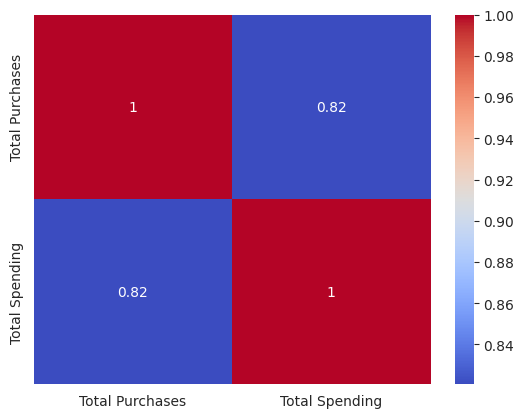

In [166]:
corr_df = cl_df[['Total Purchases', 'Total Spending']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show()

In [167]:
fig = px.scatter(
    cl_df,
    x="Total Purchases",
    y="Total Spending",
    color="Total Spending",  # Color based on spending level
    color_continuous_scale="blues",  # Smooth gradient for better visualization
    size_max=10,  # Maximum bubble size
    opacity=0.7,  # Transparency for better visibility
    trendline="ols",  # Add regression line
    title="Relationship Between Purchase Frequency and Total Spending",
    labels={"Total Purchases": "Number of Purchases", "Total Spending": "Total Amount Spent"}
)

# Update layout for better readability
fig.update_layout(
    title={
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Number of Purchases",
    yaxis_title="Total Amount Spent",
    template="plotly_white",  # Clean background
    width=1000,
    height=600,
    coloraxis_colorbar=dict(title="Spending Level")  # Improve color legend
)

fig.show()

✅ Do customers who purchase more frequently also have higher spending?


In [168]:
cl_df

,Customer_ID,Birth_Year,Education_Level,Marital_Status,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,...,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response,Age,Total Spending,Total Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41,53,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,58,1341,16
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,79,444,15
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,44,1241,18
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,69,843,21


✅ Are there customer segments that haven't made recent purchases?


In [169]:
print(f'Minimum Recency Of a Customer Is {cl_df["Last_Purchase_Days"].min()}')
print(f'Maximum Recency Of a Customer Is {cl_df["Last_Purchase_Days"].max()}')

Minimum Recency Of a Customer Is 0
Maximum Recency Of a Customer Is 99


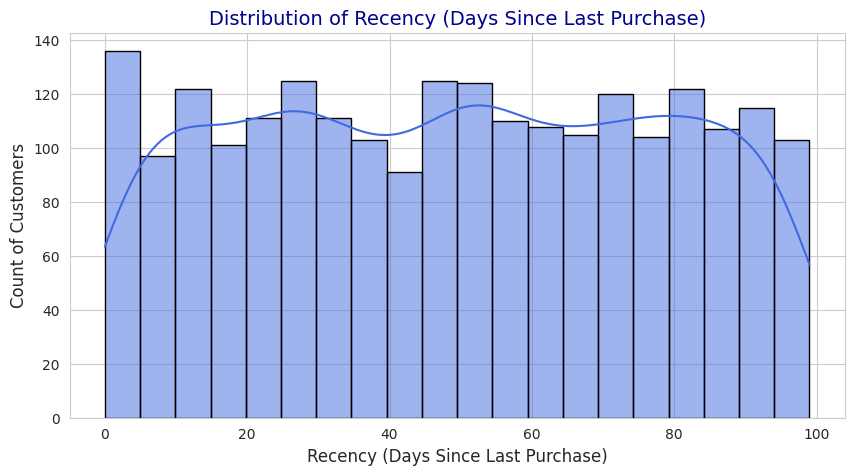

In [170]:
# Create figure
plt.figure(figsize=(10, 5))

# Plot histogram with KDE
sns.histplot(cl_df['Last_Purchase_Days'], bins=20, kde=True, color="royalblue", edgecolor="black")

# Improve labels and title
plt.xlabel("Recency (Days Since Last Purchase)", fontsize=12)
plt.ylabel("Count of Customers", fontsize=12)
plt.title("Distribution of Recency (Days Since Last Purchase)", fontsize=14, color="darkblue")

# Show plot
plt.show()

In [171]:
# If A customer Recency of a customer is more than 50 days , considerd as he has not made and recent purchase
recent_purchase_cust = cl_df[cl_df['Last_Purchase_Days'] > 50]

print(f'Number of Customers who have not made recent purchases is {len(recent_purchase_cust)}')

Number of Customers who have not made recent purchases is 1096


✅ Which group of customers should be targeted for loyalty programs?

In [172]:
"""
  1. Active Customers Having Recency (Last_Purchase_Days) less than 25,
  2. Total Purchases made by customers should be more than 18,
  3. Total Spending should be more than 1500.
"""

# Filtering customers who satisfy all three conditions for loyalty
Loyal_customers = cl_df[(cl_df['Last_Purchase_Days'] < 25) &
                        (cl_df['Total Purchases'] > 18) &
                        (cl_df['Total Spending'] > 1500)]

# Display the top loyal customers
Loyal_customers.head()


,Customer_ID,Birth_Year,Education_Level,Marital_Status,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,...,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response,Age,Total Spending,Total Purchases
51,4114,1964,Master,Married,79143.0,0,0,11-08-2012,2,650,...,0,0,0,0,3,11,0,61,1693,28
161,9260,1945,PhD,Married,70356.0,0,0,05-11-2012,20,1349,...,0,0,0,0,3,11,0,80,1706,25
188,6982,1976,Graduation,Married,74068.0,0,0,19-03-2013,14,783,...,0,0,0,0,3,11,0,49,1581,23
209,380,1954,Graduation,Divorced,64497.0,0,1,10-09-2012,17,1170,...,0,0,0,0,3,11,1,71,1804,24
243,9529,1990,Graduation,Married,73687.0,0,0,28-11-2013,8,559,...,0,1,0,0,3,11,1,35,1627,21


4️⃣ Customer Segmentation & Clustering Insights

This will help in defining customer personas and identifying high-value customers.

✅ How many distinct customer segments exist based on spending patterns?


In [173]:
CS_cl_df = cl_df.copy()

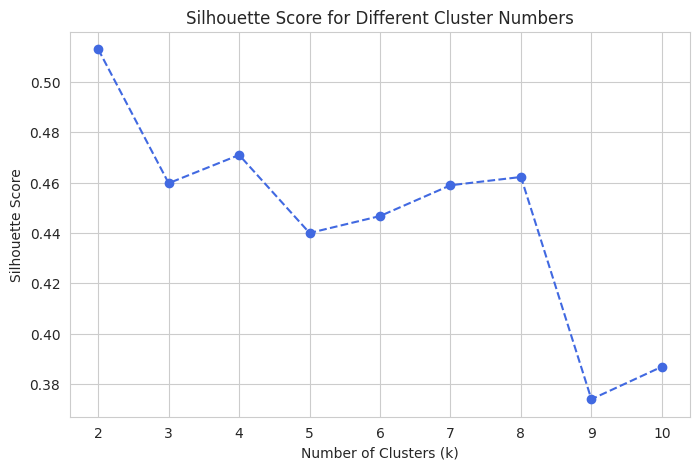

Optimal number of clusters based on Silhouette Score: 2


In [174]:
# Select spending-related features, using the updated column names
spending_features = ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']  # Updated column names
X = CS_cl_df[spending_features]

# Scale the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different k values (from 2 to 10)
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Score vs Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='royalblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.grid(True)
plt.show()

# Select the best k based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {best_k}")

In [175]:
# Apply KMeans clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
CS_cl_df['Spending_Segment'] = kmeans.fit_predict(X_scaled)

# Use PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
CS_cl_df['PCA1'] = X_pca[:, 0]
CS_cl_df['PCA2'] = X_pca[:, 1]

# Scatter plot for cluster visualization
fig = px.scatter(
    CS_cl_df,
    x="PCA1",
    y="PCA2",
    color=CS_cl_df['Spending_Segment'].astype(str),
    title=f"Customer Spending Segments (k={best_k})",
    labels={"PCA1": "Principal Component 1", "PCA2": "Principal Component 2"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    width=900,
    height=600,
    legend_title="Spending Segment"
)

fig.show()


✅ Which segment contributes the most revenue?


In [176]:
# Group by 'Spending_Segment' and sum the spending for each category
Spending_Segment_Revenue = CS_cl_df.groupby('Spending_Segment')[ # Changed cl_df to CS_cl_df
    ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']
].sum()

# Calculate total revenue per spending segment
Spending_Segment_Revenue['Total Revenue'] = Spending_Segment_Revenue.sum(axis=1)

# Sort the DataFrame by total revenue in descending order
Spending_Segment_Revenue = Spending_Segment_Revenue.sort_values(by='Total Revenue', ascending=False)

# Extract revenues for Segment 0 and Segment 1
segment_0_revenue = Spending_Segment_Revenue.loc[0, 'Total Revenue']
segment_1_revenue = Spending_Segment_Revenue.loc[1, 'Total Revenue']

# Calculate the percentage difference
percentage_difference = ((segment_0_revenue - segment_1_revenue) / segment_1_revenue) * 100

# Print the formatted output
print(f'Spending Segment 0 contributes {percentage_difference:.2f}% more revenue than Segment 1.')

Spending Segment 0 contributes 129.64% more revenue than Segment 1.


✅ Do younger or older customers spend more?


In [177]:
# Function to categorize age into different groups
def age_cat(age):
    if age <= 30:
        return 'Young'  # Age 30 and below
    elif age <= 60:
        return 'Middle-aged'  # Between 31 and 60
    else:
        return 'Old'  # Above 60

# Apply the age category function to create a new column
cl_df['Age_Category'] = cl_df['Age'].apply(age_cat)

# Group spending data by 'Age_Category' and calculate the total spending per category
Age_Category_Spending = cl_df.groupby('Age_Category')[
    ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']
].sum()

# Compute the total spending across all product categories for each age group
Age_Category_Spending['Total Spending'] = Age_Category_Spending.sum(axis=1)

# Sort the spending data in descending order based on total spending
Age_Category_Spending = Age_Category_Spending.sort_values(by='Total Spending', ascending=False)

# Display the final DataFrame
Age_Category_Spending

,Spending_Wines,Spending_Fruits,Spending_Meat,Spending_Fish,Spending_Sweets,Spending_Gold,Total Spending
Age_Category,,,,,,,
Middle-aged,383427,36527,227430,50445,37554,59469,794852
Old,295965,22273,144907,33342,22774,38931,558192
Young,1424,117,1631,270,293,209,3944


In [178]:
print(f"Old Customers are spending 14152.94 % more than young Customers , But the Middle Aged Customers are Spending more")

Old Customers are spending 14152.94 % more than young Customers , But the Middle Aged Customers are Spending more


✅ Can we identify a "high-value" customer segment based on income, spending, and frequency?


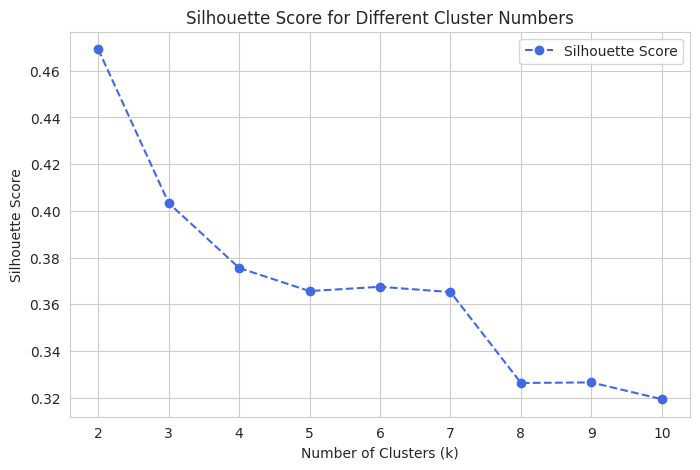

In [179]:
# Make a copy of the original DataFrame
HV_cl_df = cl_df.copy()

# Define features for clustering
spending_features = ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold',
                     'Annual_Income', 'Total Purchases']

# Extract the selected features
X = HV_cl_df[spending_features]

# Standardizing the features to ensure equal weightage
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of clusters to evaluate
k_values = range(2, 11)  # Testing k from 2 to 10
silhouette_scores = []  # Store silhouette scores for each k

# Iterate over k values to compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)  # Fit and predict clusters
    score = silhouette_score(X_scaled, cluster_labels)  # Compute silhouette score
    silhouette_scores.append(score)

# Plot Silhouette Score vs Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='royalblue', label="Silhouette Score")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.grid(True)
plt.legend()
plt.show()

In [180]:
# Ensure best_k is defined before use
if 'best_k' not in locals():
    best_k = 3  # Default value (ensure best_k is assigned from silhouette analysis)

# Apply K-Means clustering with best_k clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
HV_cl_df['Spending_Segment'] = kmeans.fit_predict(X_scaled)

# Perform PCA for dimensionality reduction (2 principal components)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

# Store PCA results in DataFrame
HV_cl_df['PCA1'] = x_pca[:, 0]
HV_cl_df['PCA2'] = x_pca[:, 1]

# Scatter plot of clusters using PCA
fig = px.scatter(
    HV_cl_df,
    x="PCA1",
    y="PCA2",
    color=HV_cl_df['Spending_Segment'].astype(str),  # Corrected variable reference
    title=f"Customer Spending Segments (k={best_k})",
    labels={"PCA1": "Principal Component 1", "PCA2": "Principal Component 2"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Improve layout for better visualization
fig.update_layout(
    width=900,
    height=600,
    legend_title="Spending Segment"
)

fig.show()

✅ Which clusters are at risk of churning (low frequency & low spending)?

Clusters at risk of churn (low frequency & low spending):
Spending_Segment
0    475
Name: count, dtype: int64


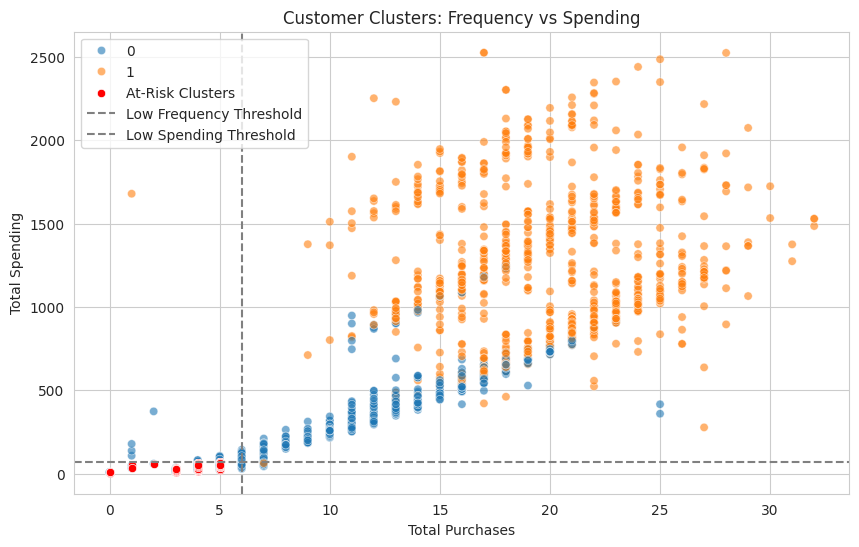


Cluster statistics:
                  mean_frequency  median_spending
Spending_Segment                                 
0                       8.090253             95.0
1                      19.740351           1191.0


In [181]:
# Define thresholds dynamically
low_freq_threshold = HV_cl_df['Total Purchases'].quantile(0.25)
low_spend_threshold = HV_cl_df['Total Spending'].quantile(0.25)

# Identify at-risk clusters
churn_risk_clusters = HV_cl_df[
    (HV_cl_df['Total Purchases'] < low_freq_threshold) &
    (HV_cl_df['Total Spending'] < low_spend_threshold)
]

# Display cluster counts
churn_risk_segment_counts = churn_risk_clusters['Spending_Segment'].value_counts()
print("Clusters at risk of churn (low frequency & low spending):")
print(churn_risk_segment_counts)

# Visualizing risk clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HV_cl_df, x='Total Purchases', y='Total Spending', hue='Spending_Segment', alpha=0.6)
sns.scatterplot(data=churn_risk_clusters, x='Total Purchases', y='Total Spending', color='red', label='At-Risk Clusters')
plt.axvline(low_freq_threshold, linestyle='--', color='gray', label="Low Frequency Threshold")
plt.axhline(low_spend_threshold, linestyle='--', color='gray', label="Low Spending Threshold")
plt.title("Customer Clusters: Frequency vs Spending")
plt.legend()
plt.show()

# Cluster statistics
cluster_stats = HV_cl_df.groupby('Spending_Segment').agg(
    mean_frequency=('Total Purchases', 'mean'),
    median_spending=('Total Spending', 'median')
)
print("\nCluster statistics:")
print(cluster_stats)

5️⃣ Business & Marketing Strategy Insights

These insights will help optimize campaigns and promotions.

✅ Which customer segment is most responsive to discounts or promotions?


In [183]:
# Calculate the average deals purchases for each customer segment
segment_response = HV_cl_df.groupby('Spending_Segment')['Deals_Purchases'].mean()

# Find the segment with the highest average response
most_responsive_segment = segment_response.idxmax()

print(f"The most responsive customer segment to discounts or promotions is segment {most_responsive_segment}.")

The most responsive customer segment to discounts or promotions is segment 0.


✅ What type of products do families (customers with kids) prefer?


In [184]:
# grtting only those customres with kids in their family
Customers_with_kids = cl_df[cl_df['Kids_at_Home'] > 0]

# Spending categories
spending_features = ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']

# Spending amount of each customer
Customers_with_kids_spending = Customers_with_kids.groupby('Customer_ID')[spending_features].sum()
# getting total spending
Customers_with_kids_spending = Customers_with_kids_spending.sum().sort_values(ascending=False).rename('Total Spending')
Customers_with_kids_spending

,Total Spending
Spending_Wines,97449
Spending_Meat,45551
Spending_Gold,20981
Spending_Fish,11439
Spending_Sweets,8256
Spending_Fruits,7982


In [185]:
col_names = Customers_with_kids_spending.index
values = Customers_with_kids_spending.values

fig = px.bar(
    x = col_names,
    y= values,
    text_auto=True ,
    color_discrete_sequence=px.colors.qualitative.Set2,
    color = col_names
)
fig.update_layout(
    title={
        'text' : 'Spending Categories of Customers with Kids',
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Spending Categories",  # Changed x_title to xaxis_title
    yaxis_title="Total Spending",  # Changed y_title to yaxis_title
    template="seaborn",
    width=1000,
    height=600
)

✅ Should marketing strategies focus on high spenders or frequent buyers?


In [186]:
# Assume today's date (use actual date if available)
today = pd.Timestamp("2025-04-01")

# Ensure 'LastPurchaseDate' column exists (use 'Customer_Since' if missing)
if 'LastPurchaseDate' not in cl_df.columns:
    cl_df['LastPurchaseDate'] = pd.to_datetime(cl_df['Customer_Since'], errors='coerce')  # Ensure correct format

# Copy dataset for RFM analysis
rfm = cl_df.copy()

# Calculate RFM metrics
rfm['Recency'] = (today - rfm['LastPurchaseDate']).dt.days  # Days since last purchase
rfm['Frequency'] = rfm[['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']].sum(axis=1)  # Purchase count
rfm['Monetary'] = rfm[['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                       'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']].sum(axis=1)  # Total spend

# Drop rows with missing dates
rfm = rfm.dropna(subset=['Recency'])

# Rank RFM values (1 = worst, 5 = best)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)  # Recent buyers get higher scores
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)  # More frequent buyers get higher scores
rfm['M'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)  # Higher spenders get higher scores

# Combine RFM scores into a single metric
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Define segment mapping logic
def segment(rfm_score):
    if rfm_score >= '555': return 'Champions'
    elif rfm_score >= '444': return 'Loyal Customers'
    elif rfm_score >= '344': return 'Potential Loyalists'
    elif rfm_score >= '244': return 'Needs Attention'
    elif rfm_score >= '144': return 'At Risk'
    else: return 'Lost Customers'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)

# Summarize RFM segmentation
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'  # Count of customers in each segment
}).rename(columns={'Customer_ID': 'Customer Count'}).sort_values(by='Monetary', ascending=False)

# Display the segment summary
segment_summary


,Recency,Frequency,Monetary,Customer Count
Segment,,,,
Champions,3890.363636,22.000000,1693.636364,11
At Risk,4532.329670,13.505495,706.730769,182
Needs Attention,4354.494898,13.234694,645.198980,196
Loyal Customers,3957.995595,12.718062,625.268722,227
Potential Loyalists,4204.067010,12.731959,608.051546,194
Lost Customers,4679.669811,8.745283,310.150943,106


<ipython-input-190-9aa59d55af7b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




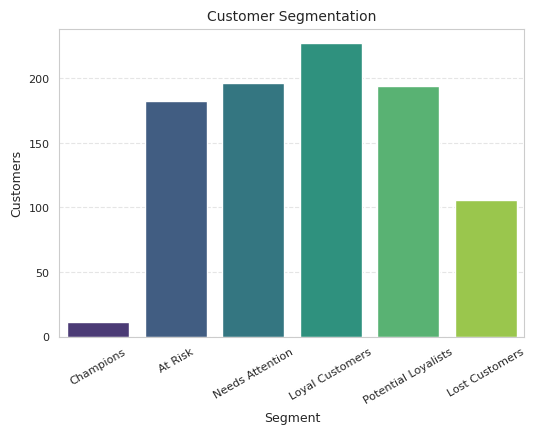

In [190]:
plt.figure(figsize=(6, 4))  # Reduced size
sns.barplot(x=segment_summary.index, y=segment_summary['Customer Count'], palette="viridis")

plt.title("Customer Segmentation", fontsize=10)
plt.xlabel("Segment", fontsize=9)
plt.ylabel("Customers", fontsize=9)
plt.xticks(rotation=30, fontsize=8)  # Rotate labels for readability
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


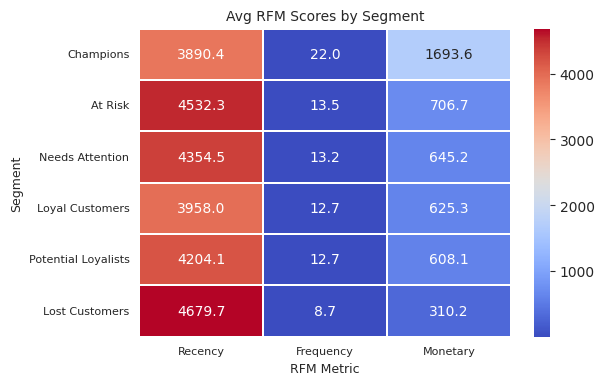

In [191]:
plt.figure(figsize=(6, 4))  # Reduced size
sns.heatmap(segment_summary.drop(columns=['Customer Count']), cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.3)

plt.title("Avg RFM Scores by Segment", fontsize=10)
plt.xlabel("RFM Metric", fontsize=9)
plt.ylabel("Segment", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()
